In [3]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline

In [4]:
#Load the csv data
results_schema = pd.read_csv("survey_results_schema.csv")
results_public = pd.read_csv("survey_results_public.csv")

In [5]:
print("Total number of questions in survey: {}".format(len(results_schema)))
print("Total number of respondents: {}".format(len(results_public)))
print("Sample of the results schema: ")
display(results_schema.head(n=5))
print("Sample of the results public: ")
display(results_public.head(n=5))

Total number of questions in survey: 154
Total number of respondents: 51392
Sample of the results schema: 


,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Sample of the results public: 


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1: What are the most popular programming languages in different countries?

In [6]:
is_in_germany = results_public['Country'] == 'Germany'
is_in_uk = results_public['Country'] == 'United Kingdom'
is_in_usa = results_public['Country'] == 'United States'

results_public_germany = results_public[is_in_germany]
results_public_uk = results_public[is_in_uk]
results_public_usa = results_public[is_in_usa]

print("Number of respondents in Germany: " + str(len(results_public_germany)))
print("Number of respondents in United Kingdom: " + str(len(results_public_uk)))
print("Number of respondents in United States: " + str(len(results_public_usa)))

Number of respondents in Germany: 4143
Number of respondents in United Kingdom: 4395
Number of respondents in United States: 11455


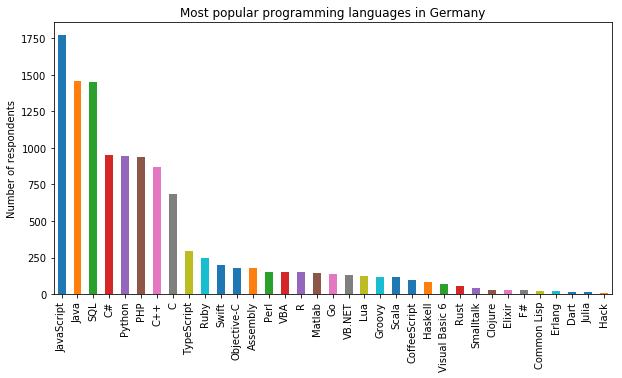

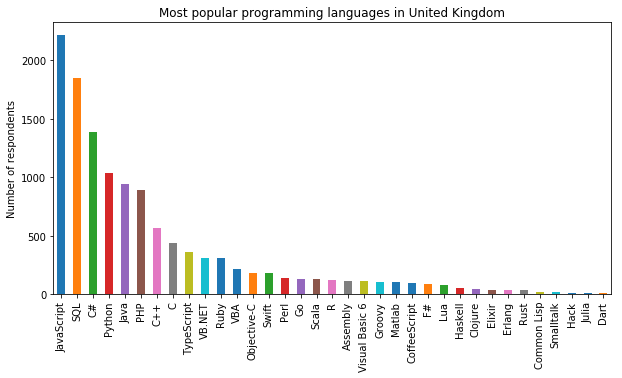

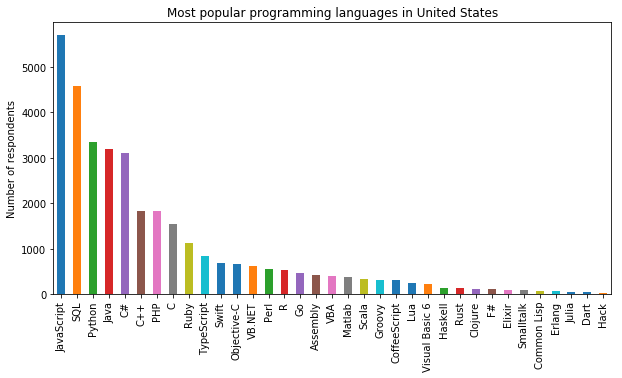

In [32]:
def create_langauage_chart(country, results_public_country):
    plt.figure(figsize=(10,5))
    plt.ylabel('Number of respondents')
    plt.title('Most popular programming languages in ' + country)
    worked_language = results_public_country['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
    worked_language.plot(kind="bar") #TODO improve format

create_langauage_chart('Germany', results_public_germany)
create_langauage_chart('United Kingdom', results_public_uk)
create_langauage_chart('United States', results_public_usa)

#### Conclusion
    sadf
    

# Question 2: What is the correlation between programming language, experience and salary?

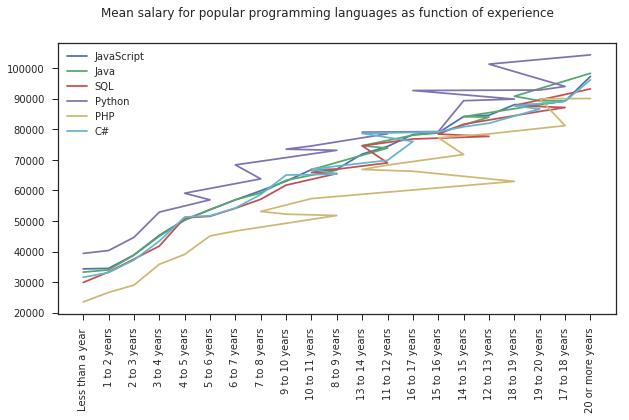

In [146]:
def create_salary_chart_for_language(language_list, results_dataframe):
    fig, ax = plt.subplots(figsize=(10,5))
    for language in language_list:
        contains_language = results_dataframe['HaveWorkedLanguage'].str.contains(language)
        results_language = results_dataframe[contains_language]
        results_salary_experience = results_language[['Salary', 'YearsCodedJob']]
        mean_salary_for_experience = results_salary_experience.groupby('YearsCodedJob').agg('mean')
        mean_salary_for_experience = mean_salary_for_experience.sort_values(by=['Salary'])
        mean_salary_for_experience['YearsCodedJob'] = mean_salary_for_experience.index
        mean_salary_for_experience = dict(zip(mean_salary_for_experience.YearsCodedJob,mean_salary_for_experience.Salary))
        names = list(mean_salary_for_experience.keys())
        values = list(mean_salary_for_experience.values())
        ax.plot(names, values, label=language)
        ax.legend(loc="upper left")
        plt.xticks(names, names, rotation='vertical')
        fig.suptitle('Mean salary for popular programming languages as function of experience')
        
results_experience_available = results_public.dropna(subset=['YearsCodedJob'])
results_experience_and_language_available = results_experience_available.dropna(subset=['HaveWorkedLanguage'])
results_experience_language_and_salary_available = results_experience_and_language_available.dropna(subset=['Salary'])
results_experience_available['YearsCodedJob'].unique()
results_experience_available['HaveWorkedLanguage'].str.contains('JavaScript')
language_list = ["JavaScript", "Java", "SQL", "Python", "PHP", "C#"]

create_salary_chart_for_language(language_list, results_experience_language_and_salary_available)

# Question 3: What is the most popular occupation for the respondents?

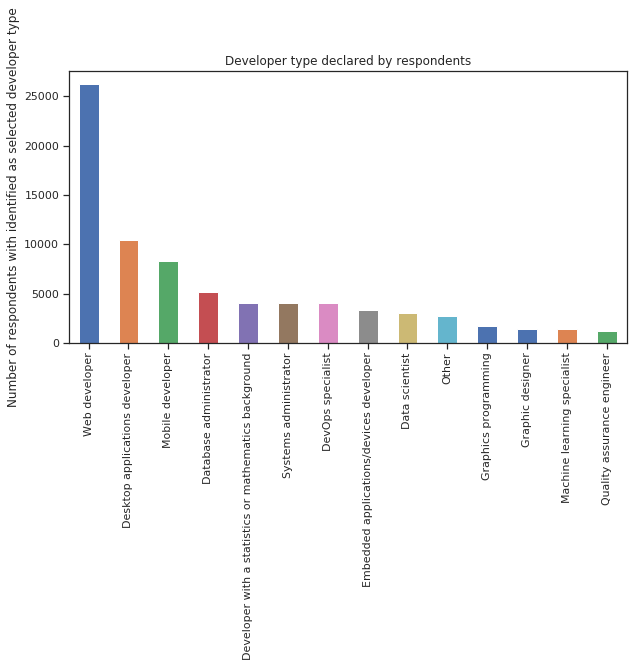

In [13]:
results_developer_type_available = results_public.dropna(subset=['DeveloperType'])
results_developer_type_available['DeveloperType']
developer_type = results_developer_type_available['DeveloperType'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of respondents with identified as selected developer type')
plt.title('Developer type declared by respondents')
    
developer_type.plot(kind="bar") #TODO improve format
